In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [2]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv("Reviews.csv")


In [4]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.shape


(568454, 10)

In [6]:
df.columns


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
df.isnull().sum()


Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [8]:
df['review'] = df['Summary'].fillna('') + ' ' + df['Text']


In [9]:
def get_sentiment(score):
    if score > 3:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['Score'].apply(get_sentiment)


In [10]:
df = df[['review', 'sentiment']]


In [11]:
df.head()


,review,sentiment
0,Good Quality Dog Food I have bought several of...,Positive
1,Not as Advertised Product arrived labeled as J...,Negative
2,"""Delight"" says it all This is a confection tha...",Positive
3,Cough Medicine If you are looking for the secr...,Negative
4,Great taffy Great taffy at a great price. The...,Positive


In [12]:
df['sentiment'].value_counts()


sentiment
Positive    443777
Negative     82037
Neutral      42640
Name: count, dtype: int64

In [13]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)        # remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)     # remove punctuation & numbers
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [14]:
df['clean_review'] = df['review'].apply(clean_text)


In [15]:
df[['review', 'clean_review']].head(3)


,review,clean_review
0,Good Quality Dog Food I have bought several of...,good quality dog food i have bought several of...
1,Not as Advertised Product arrived labeled as J...,not as advertised product arrived labeled as j...
2,"""Delight"" says it all This is a confection tha...",delight says it all this is a confection that ...


In [16]:
df = df.sample(10000, random_state=42)


In [17]:
df.shape


(10000, 3)

In [18]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [19]:
def preprocess_text(text):
    words = text.split()                       # tokenization
    words = [w for w in words if w not in stop_words]  # stopword removal
    words = [lemmatizer.lemmatize(w) for w in words]   # lemmatization
    return ' '.join(words)


In [20]:
df['processed_review'] = df['clean_review'].apply(preprocess_text)


In [21]:
df[['clean_review', 'processed_review']].head(3)


,clean_review,processed_review
165256,crunchy good glutenfree sandwich cookies havin...,crunchy good glutenfree sandwich cooky tried c...
231465,great kitty treats my cat loves these treats i...,great kitty treat cat love treat ever cant fin...
427827,coffee taste a little less than i expected it ...,coffee taste little less expected tends muddy ...


In [22]:
df['sentiment'].value_counts()


sentiment
Positive    7852
Negative    1398
Neutral      750
Name: count, dtype: int64

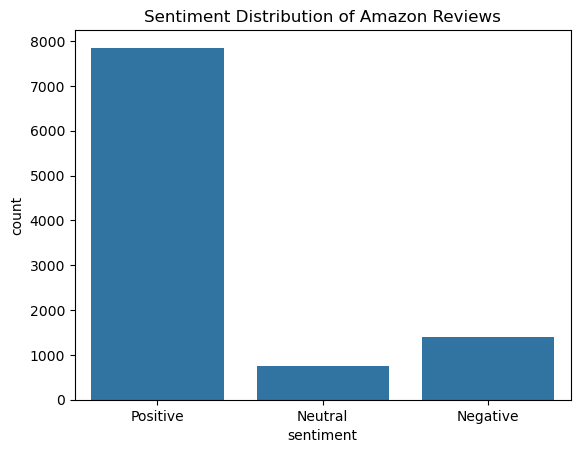

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution of Amazon Reviews")
plt.show()


In [24]:
from collections import Counter

all_words = ' '.join(df['processed_review'])
word_freq = Counter(all_words.split())
word_freq.most_common(10)


[('like', 4847),
 ('good', 4378),
 ('great', 4227),
 ('taste', 4212),
 ('product', 3566),
 ('love', 3429),
 ('one', 3422),
 ('coffee', 3392),
 ('flavor', 3377),
 ('tea', 3169)]

In [25]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


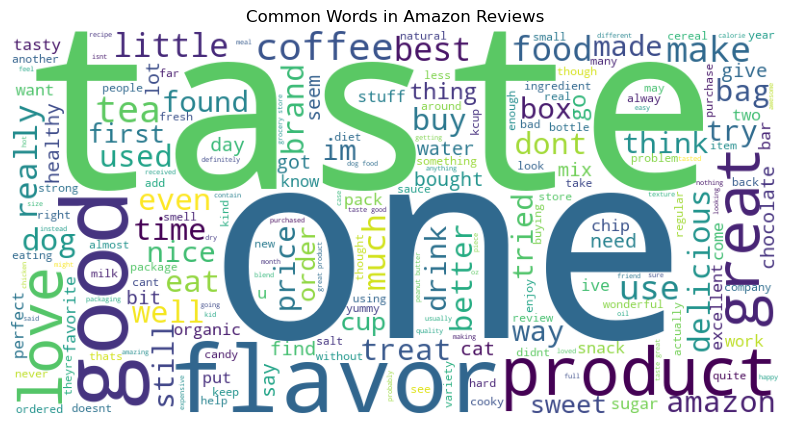

In [26]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(all_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Common Words in Amazon Reviews")
plt.show()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [28]:
tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['processed_review'])
y = df['sentiment']


In [30]:
X.shape


(10000, 5000)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [33]:
y_pred = model.predict(X_test)


In [34]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.851

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.79      0.50      0.61       280
     Neutral       0.60      0.06      0.11       150
    Positive       0.86      0.99      0.92      1570

    accuracy                           0.85      2000
   macro avg       0.75      0.52      0.55      2000
weighted avg       0.83      0.85      0.82      2000



In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


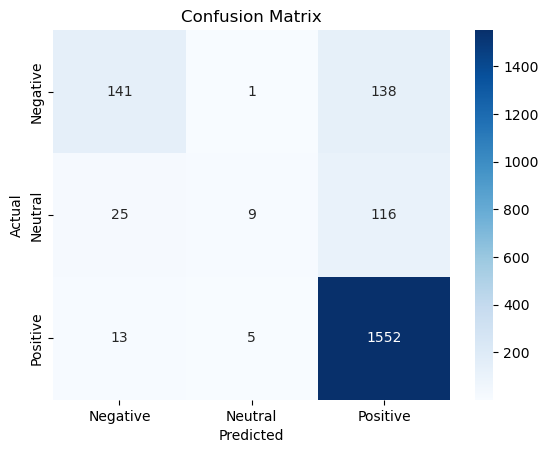

In [37]:
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=model.classes_,
            yticklabels=model.classes_,
            cmap='Blues')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [38]:
df['review_length'] = df['processed_review'].apply(lambda x: len(x.split()))


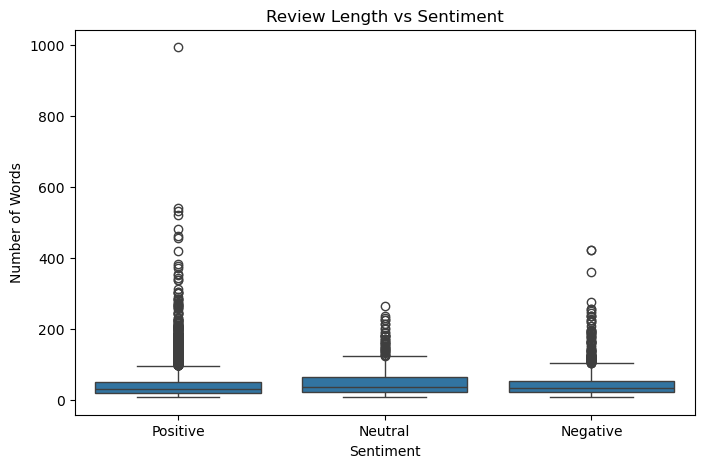

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title("Review Length vs Sentiment")
plt.ylabel("Number of Words")
plt.xlabel("Sentiment")
plt.show()


In [40]:
from collections import Counter

def top_words(sentiment, n=10):
    text = ' '.join(df[df['sentiment'] == sentiment]['processed_review'])
    return Counter(text.split()).most_common(n)


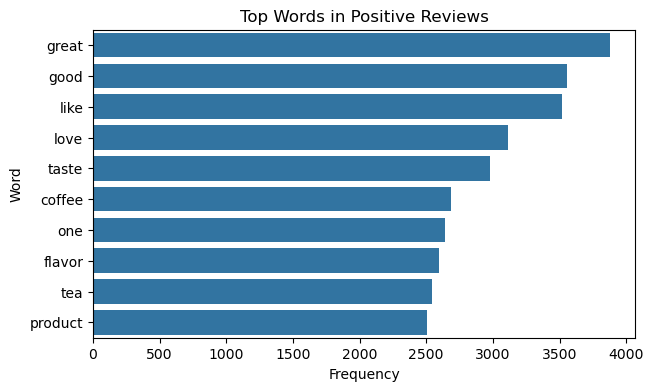

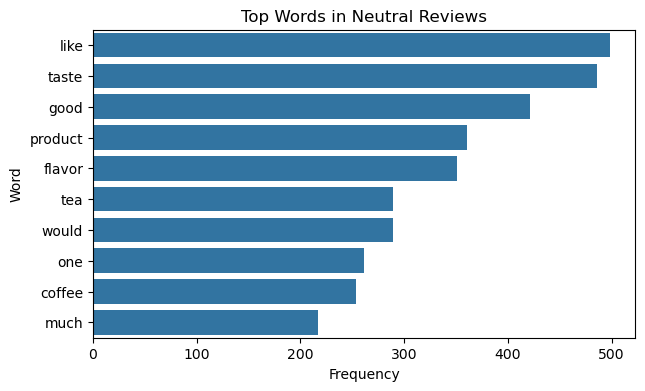

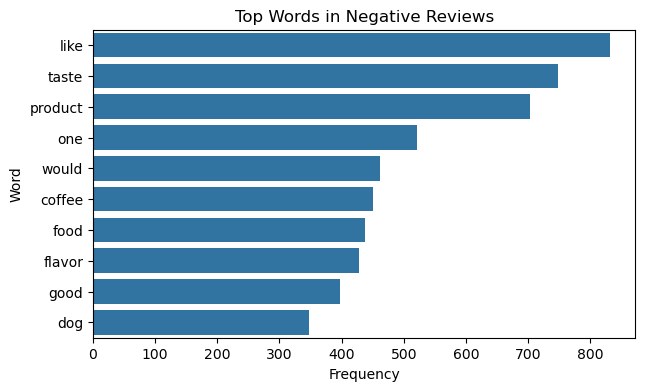

In [41]:
for sentiment in df['sentiment'].unique():
    words = top_words(sentiment)
    words_df = pd.DataFrame(words, columns=['Word', 'Frequency'])
    
    plt.figure(figsize=(7,4))
    sns.barplot(x='Frequency', y='Word', data=words_df)
    plt.title(f"Top Words in {sentiment} Reviews")
    plt.show()


In [42]:
# Create a 10,000-row sample from your dataframe
sample_df = df.sample(10000, random_state=42)

# Save it as a new CSV file
sample_df.to_csv("Reviews_sample.csv", index=False)


In [43]:
import os
os.getcwd()


'C:\\Users\\User'